# Model Comparison
## Find the Best Model



In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from glob import glob
from collections import Counter, namedtuple
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!pwd

/Users/chris/github/reddit_nlp


In [3]:
# === TODO === #
# use postgres to store and retrieve the compare df rows

In [4]:
reports = glob('data/compare_df/*.csv')
reports

['data/compare_df/2020-05-10_1333.csv',
 'data/compare_df/2020-05-09_1844.csv',
 'data/compare_df/2020-05-10_1320.csv',
 'data/compare_df/2020-05-12_1830.csv',
 'data/compare_df/2020-05-11_1732.csv',
 'data/compare_df/2020-05-12_2240.csv',
 'data/compare_df/2020-05-10_1337.csv',
 'data/compare_df/2020-05-09_1940.csv',
 'data/compare_df/2020-05-09_1607.csv',
 'data/compare_df/2020-05-10_2328.csv',
 'data/compare_df/2020-05-10_1353.csv',
 'data/compare_df/2020-05-10_1424.csv',
 'data/compare_df/2020-05-09_1428.csv',
 'data/compare_df/2020-05-09_0938.csv',
 'data/compare_df/2020-05-09_1746.csv',
 'data/compare_df/2020-05-10_1403.csv',
 'data/compare_df/2020-05-11_2130.csv',
 'data/compare_df/2020-05-10_1404.csv',
 'data/compare_df/2020-05-12_1326.csv',
 'data/compare_df/2020-05-12_1632.csv',
 'data/compare_df/2020-05-11_1311.csv',
 'data/compare_df/2020-05-12_0112.csv']

In [5]:
df = pd.DataFrame()

In [6]:
for report in reports:
    data = pd.read_csv(report)
    df = df.append(data)
    

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head(10)

,preprocessor,estimator,best_train_score,best_test_score,time_weighted_score,roc_auc,train_test_variance,fit_time_seconds,predict_time_seconds,best_params,subreddits,date
0,TfidfVectorizer,XGBoost Classifier,0.540,0.451,56.954,0.817,0.165,7.854,0.057,"{'xgbclassifier__n_estimators': 50, 'xgbclassi...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
1,TfidfVectorizer,MLPClassifier,0.162,0.163,46.355,0.805,-0.007,3.480,0.043,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
2,TfidfVectorizer,Logistic Regression,0.595,0.492,2934.932,0.839,0.173,0.148,0.020,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
3,TfidfVectorizer,Random Forest,0.287,0.270,768.463,0.812,0.062,0.301,0.049,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
4,TfidfVectorizer,K Nearest Neighbors,0.369,0.181,422.500,0.555,0.511,0.078,0.350,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
5,TfidfVectorizer,Multinomial Bayes Classifier,0.826,0.547,5815.579,0.885,0.337,0.072,0.023,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
6,TfidfVectorizer,Support Vector Classifier,0.569,0.509,221.333,0.885,0.104,1.857,0.444,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
7,TfidfVectorizer,AdaBoost Classifier,0.266,0.254,613.609,0.612,0.046,0.360,0.053,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.599,0.501,15.091,0.856,0.163,33.112,0.089,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
9,TfidfVectorizer,Bagging Classifier,0.774,0.446,46.036,0.805,0.424,9.406,0.274,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999


In [8]:
columns_of_interest = ['preprocessor','estimator','best_test_score', 'roc_auc', 'fit_time_seconds','time_weighted_score']

In [11]:
df.sort_values(by='time_weighted_score', ascending=False)[columns_of_interest].head(20)

,preprocessor,estimator,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
5,TfidfVectorizer,Multinomial Bayes Classifier,0.757,0.927,0.072,8279.138
5,TfidfVectorizer,Multinomial Bayes Classifier,0.642,0.884,0.062,8035.758
5,TfidfVectorizer,Multinomial Bayes Classifier,0.670,0.896,0.068,7595.064
5,TfidfVectorizer,Multinomial Bayes Classifier,0.684,0.917,0.084,6270.312
13,TfidfVectorizer,Linear SVC,0.710,0.894,0.097,6120.738
5,TfidfVectorizer,Multinomial Bayes Classifier,0.659,0.900,0.086,5918.478
5,TfidfVectorizer,Multinomial Bayes Classifier,0.547,0.885,0.072,5815.579
5,TfidfVectorizer,Multinomial Bayes Classifier,0.707,0.908,0.097,5579.585
13,TfidfVectorizer,Linear SVC,0.693,0.907,0.104,5493.037
5,TfidfVectorizer,Multinomial Bayes Classifier,0.683,0.906,0.097,5445.424


In [12]:
df.sort_values(by='best_test_score', ascending=False)[columns_of_interest].head(20)

,preprocessor,estimator,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
14,TfidfVectorizer,Linear SVC,0.759,0.880,0.317,2245.237
5,TfidfVectorizer,Multinomial Bayes Classifier,0.757,0.927,0.072,8279.138
12,TfidfVectorizer,Passive Agressive Classifier,0.753,0.880,0.257,2617.406
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.751,0.928,50.706,14.776
2,TfidfVectorizer,Logistic Regression,0.740,0.919,0.261,2526.104
5,TfidfVectorizer,Multinomial Bayes Classifier,0.739,0.934,0.198,3056.260
1,TfidfVectorizer,MLPClassifier,0.735,0.937,274.782,2.676
13,TfidfVectorizer,Linear SVC,0.732,0.925,0.483,1393.668
1,TfidfVectorizer,MLPClassifier,0.730,0.911,86.753,8.410
2,TfidfVectorizer,Logistic Regression,0.729,0.929,0.562,1210.102


In [13]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='best_test_score', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.655182,0.896455,0.134227,4514.902000
Bagging Classifier Logistic Regression,0.652182,0.902455,75.862091,10.537864
Linear SVC,0.647000,0.878955,0.256500,2700.224182
Extra Trees Classifier,0.642818,0.884500,26.445909,29.957227
Support Vector Classifier,0.640455,0.896455,4.889273,136.304909
Logistic Regression,0.638136,0.895818,0.850545,1421.647364
Passive Agressive Classifier,0.637182,0.878955,0.264182,2280.137045
Gradient Boosting Classifier,0.625500,0.864000,699.442333,13.996333
MLPClassifier,0.622095,0.889095,62.068762,21.666619


# Best Params

In [94]:
params_tuple_list = []
for param_grid in df.best_params:
    for key, value in eval(param_grid).items():
        estimator, parameter = key.split('__')
        params_tuple_list.append((estimator, parameter, value))
        
counted = dict(Counter(params_tuple_list))
counted

{('xgbclassifier', 'n_estimators', 50): 6,
 ('xgbclassifier', 'max_depth', 5): 8,
 ('xgbclassifier', 'hidden_layer_sizes', 25): 12,
 ('tfidfvectorizer', 'use_idf', True): 175,
 ('tfidfvectorizer', 'strip_accents', 'unicode'): 107,
 ('tfidfvectorizer', 'norm', 'l1'): 128,
 ('tfidfvectorizer', 'ngram_range', (1, 1)): 153,
 ('tfidfvectorizer', 'min_df', 2): 215,
 ('tfidfvectorizer', 'max_features', 6000): 115,
 ('tfidfvectorizer', 'max_df', 0.8): 65,
 ('tfidfvectorizer', 'use_idf', False): 140,
 ('tfidfvectorizer', 'strip_accents', None): 94,
 ('tfidfvectorizer', 'ngram_range', (1, 2)): 162,
 ('tfidfvectorizer', 'min_df', 14): 22,
 ('tfidfvectorizer', 'max_features', 5000): 108,
 ('tfidfvectorizer', 'max_df', 0.895): 60,
 ('mlpclassifier', 'hidden_layer_sizes', (500,)): 5,
 ('mlpclassifier', 'alpha', 0.7500249999999999): 4,
 ('mlpclassifier', 'activation', 'logistic'): 2,
 ('tfidfvectorizer', 'strip_accents', 'ascii'): 114,
 ('logisticregression', 'solver', 'saga'): 13,
 ('logisticregress

In [90]:
def plot_best_params(estimator, parameter=None, cmap='Blues_r'):
    
    if parameter is None:
        string_keys = [(f'{key[1]}: {key[2]}') for key, _ in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator]
        string_values = [value for key, value in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()}')
        
        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);
    
    else:
        string_keys = [(f'{key[1]}: {key[2]}') for key, _ in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator and key[1] == parameter]
        string_values = [value for key, value in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator and key[1] == parameter]
        
        plt.figure(figsize=(2 * len(key_val_list), 2 * len(key_val_list)))
        plt.title(f'{estimator.upper()} {parameter.upper()}')

        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);



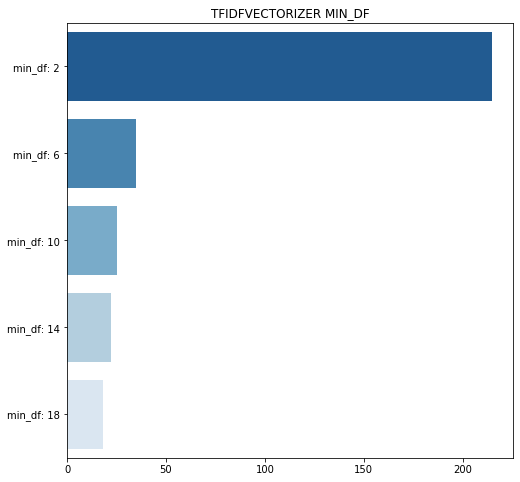

In [87]:
plot_best_params('tfidfvectorizer', 'min_df')

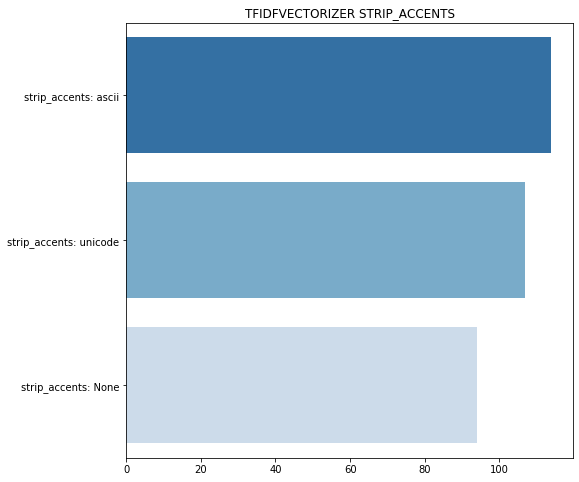

In [88]:
plot_best_params('tfidfvectorizer', 'strip_accents')

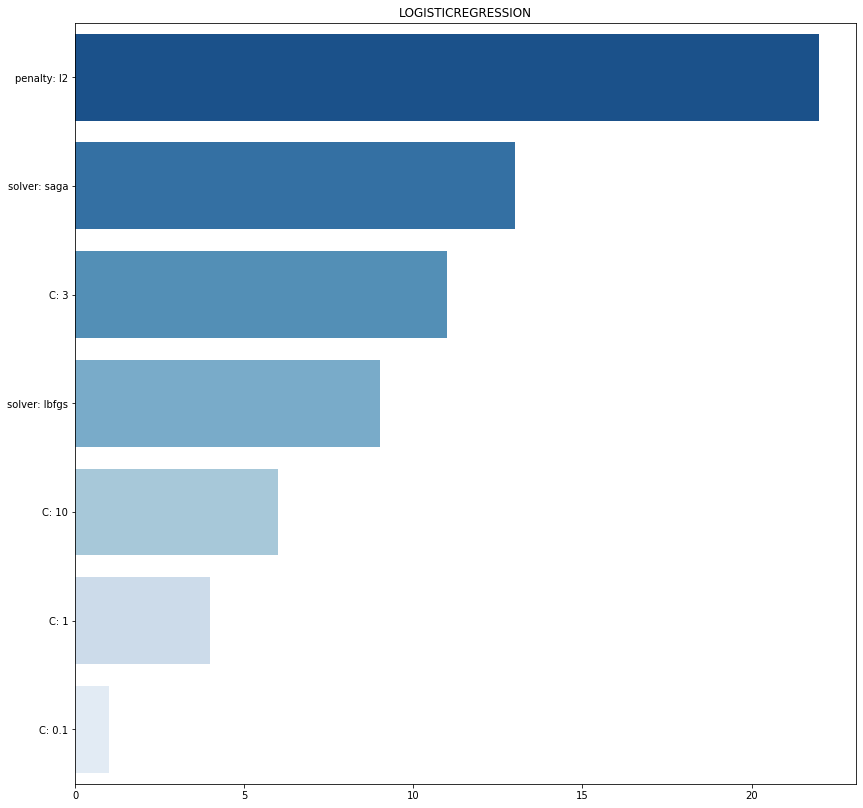

In [91]:
plot_best_params('logisticregression')

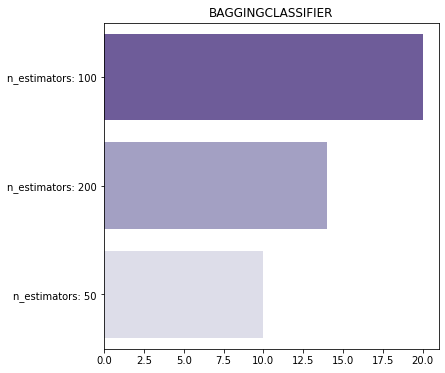

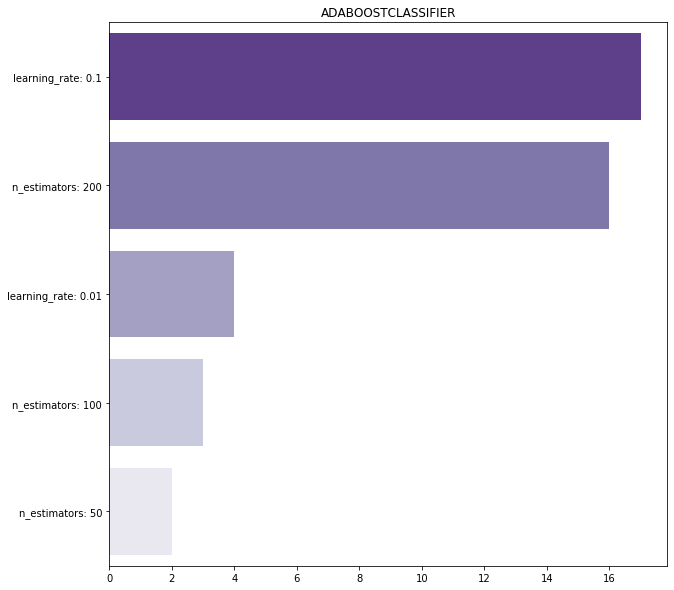

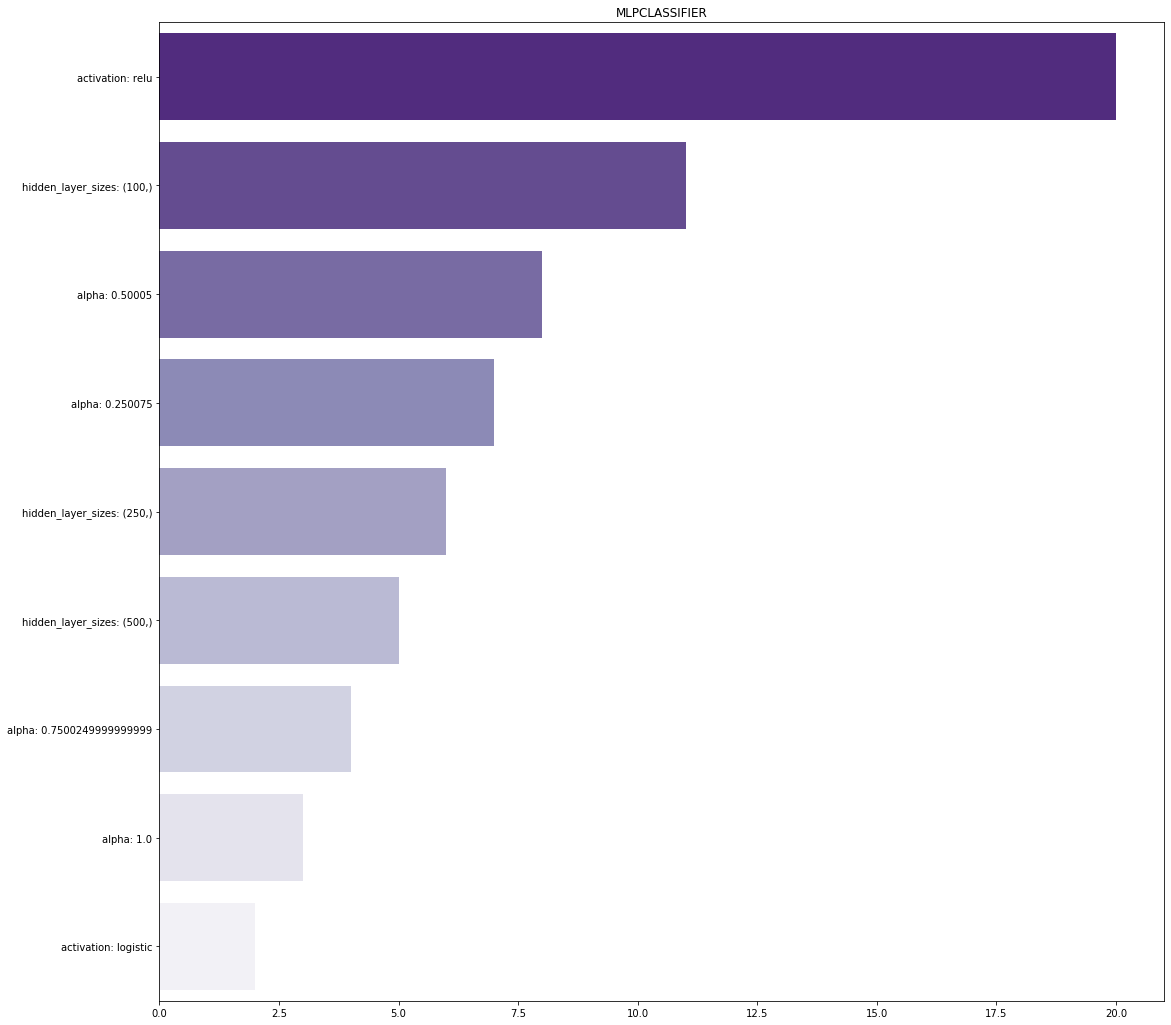

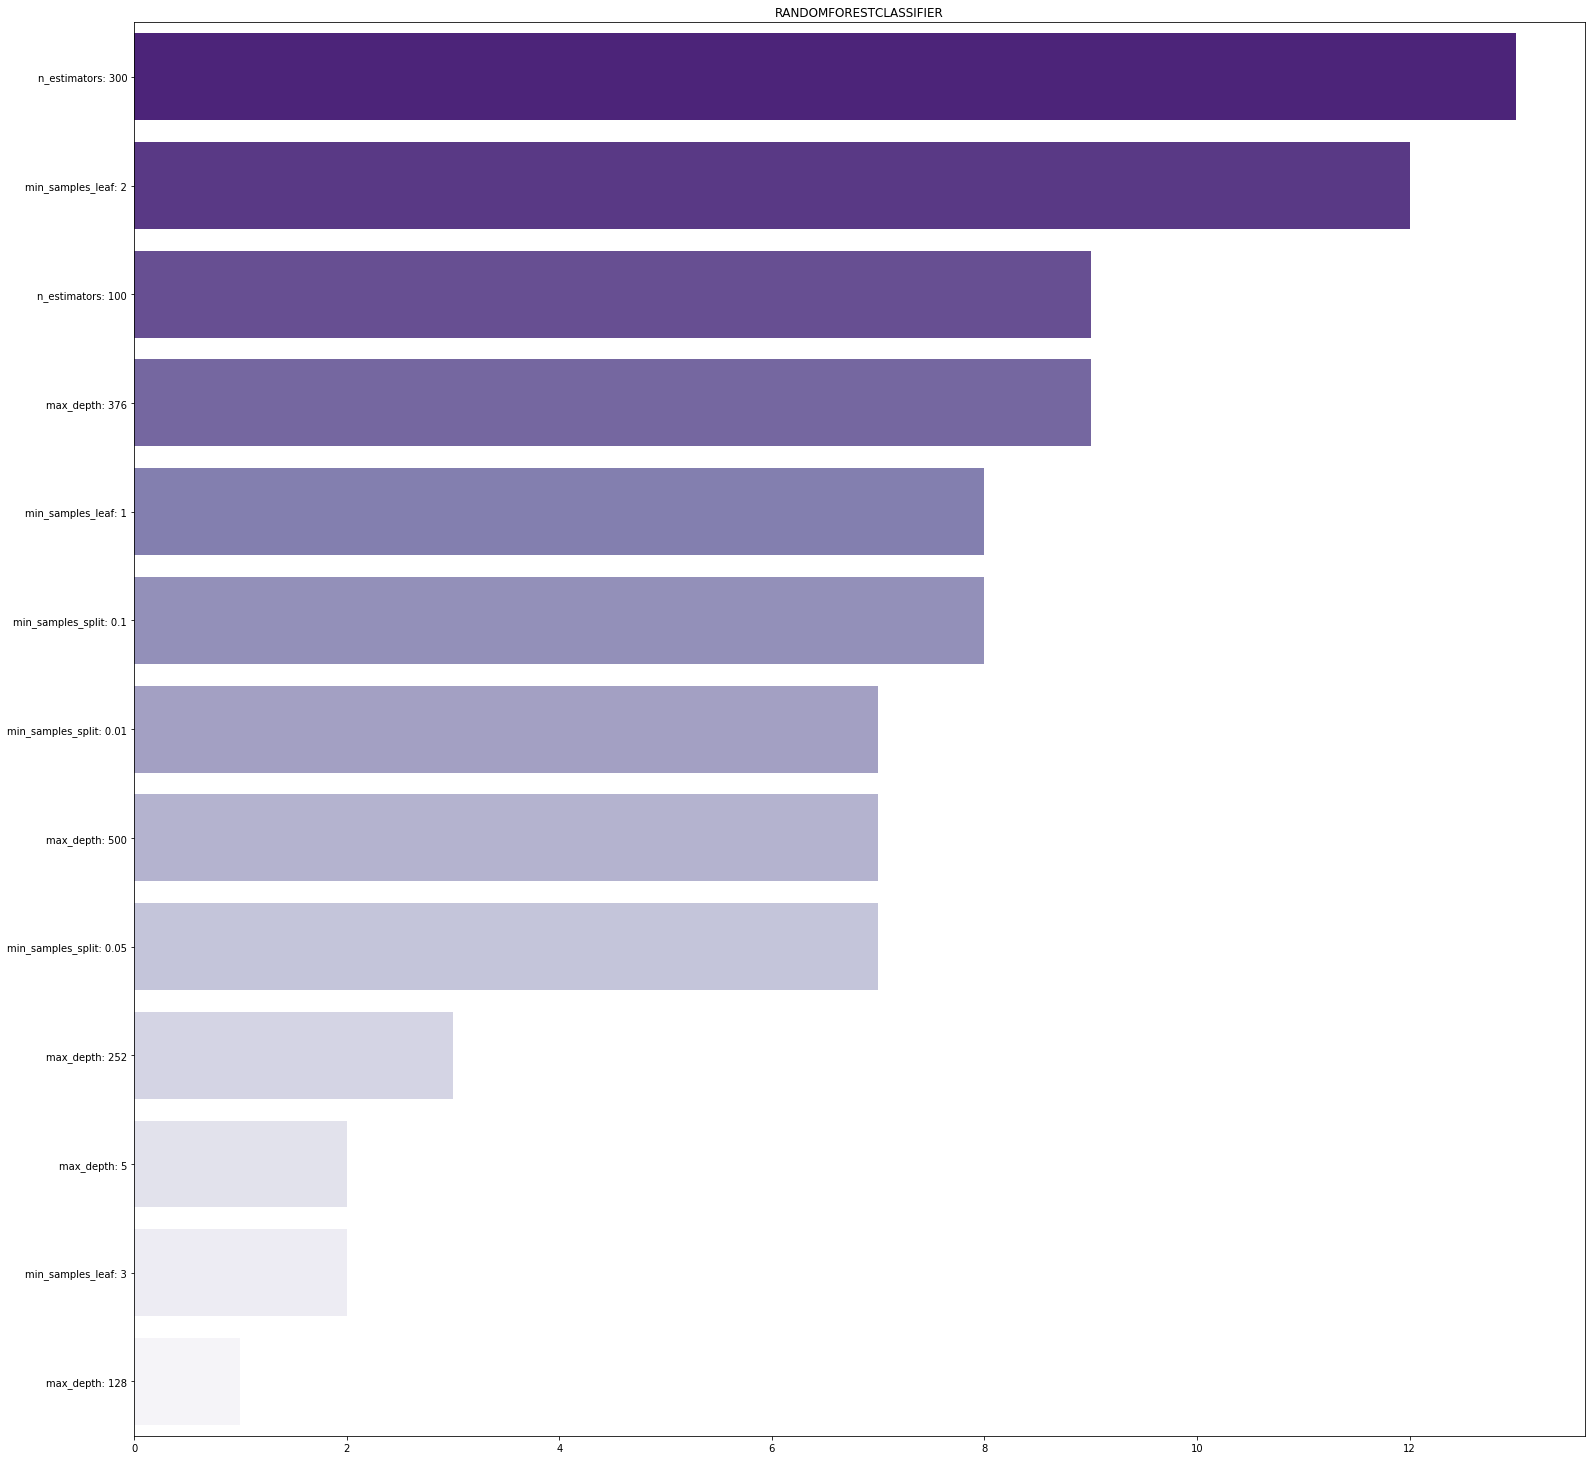

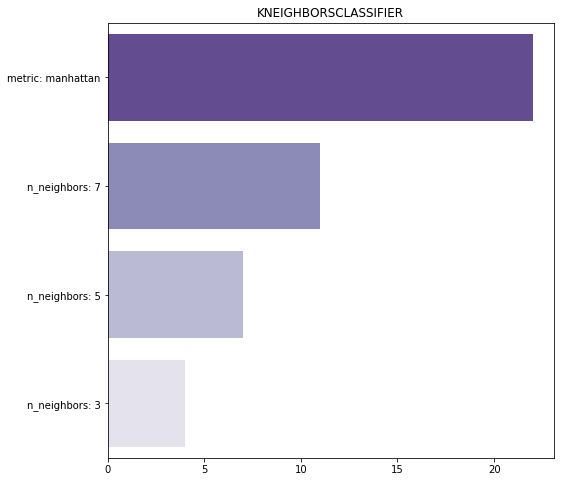

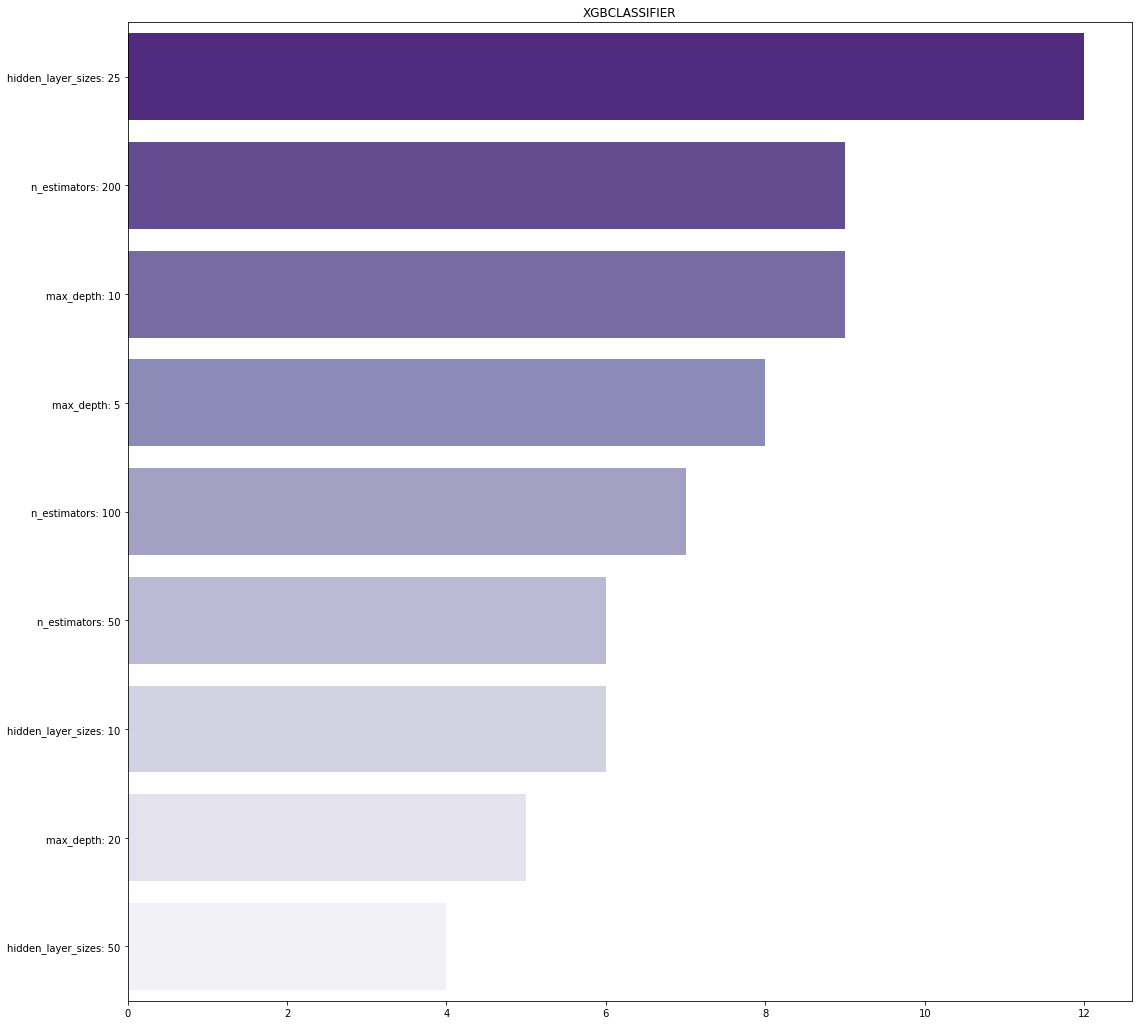

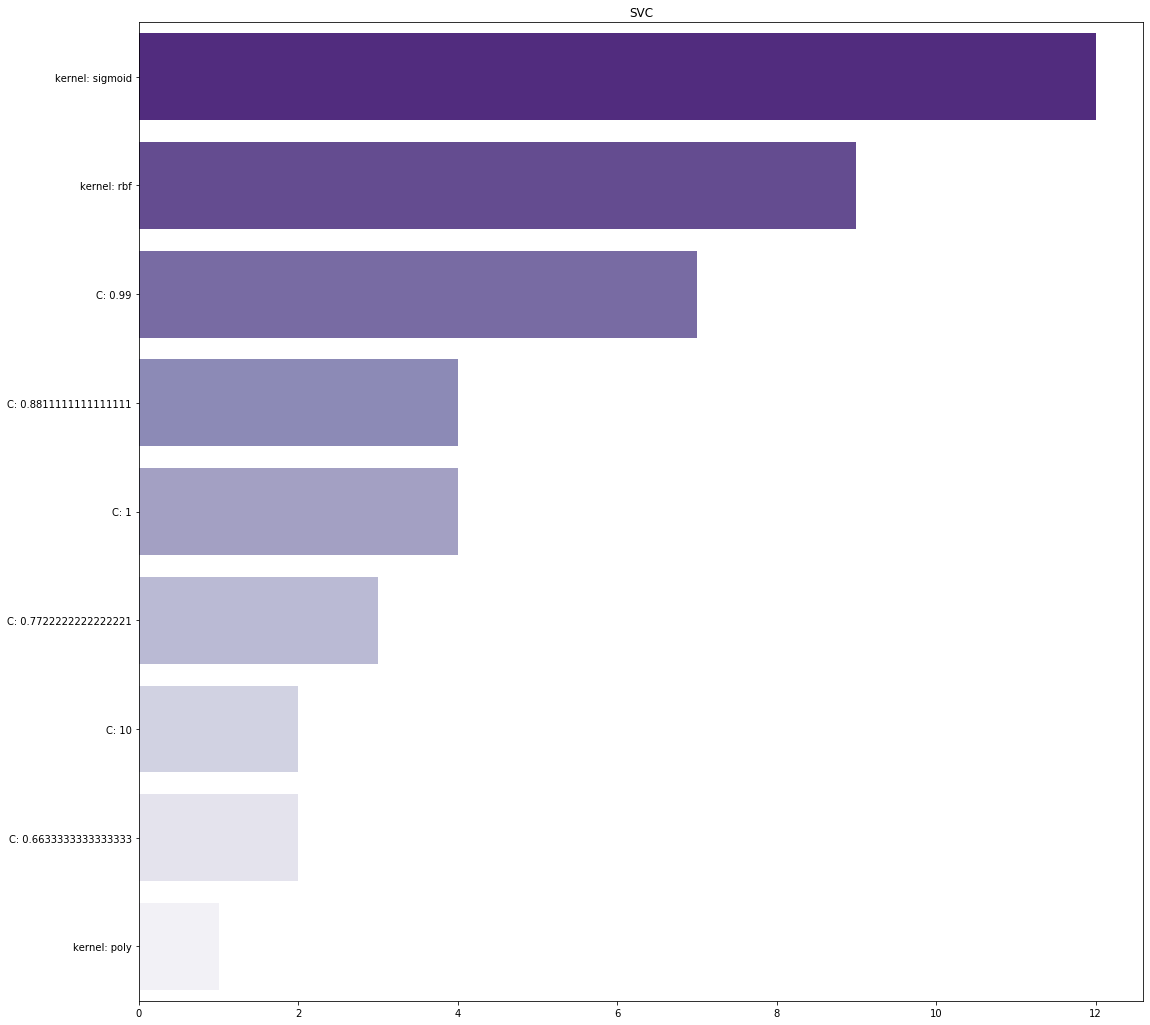

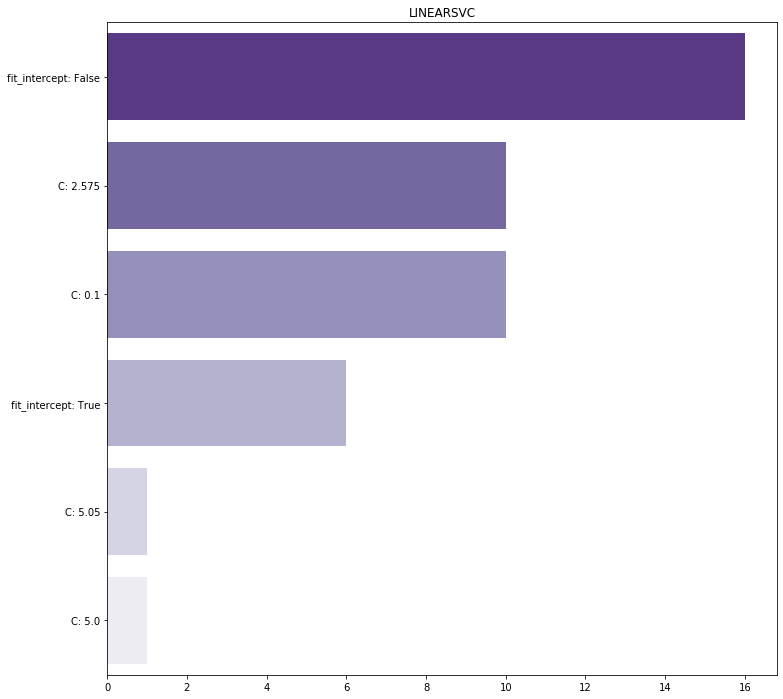

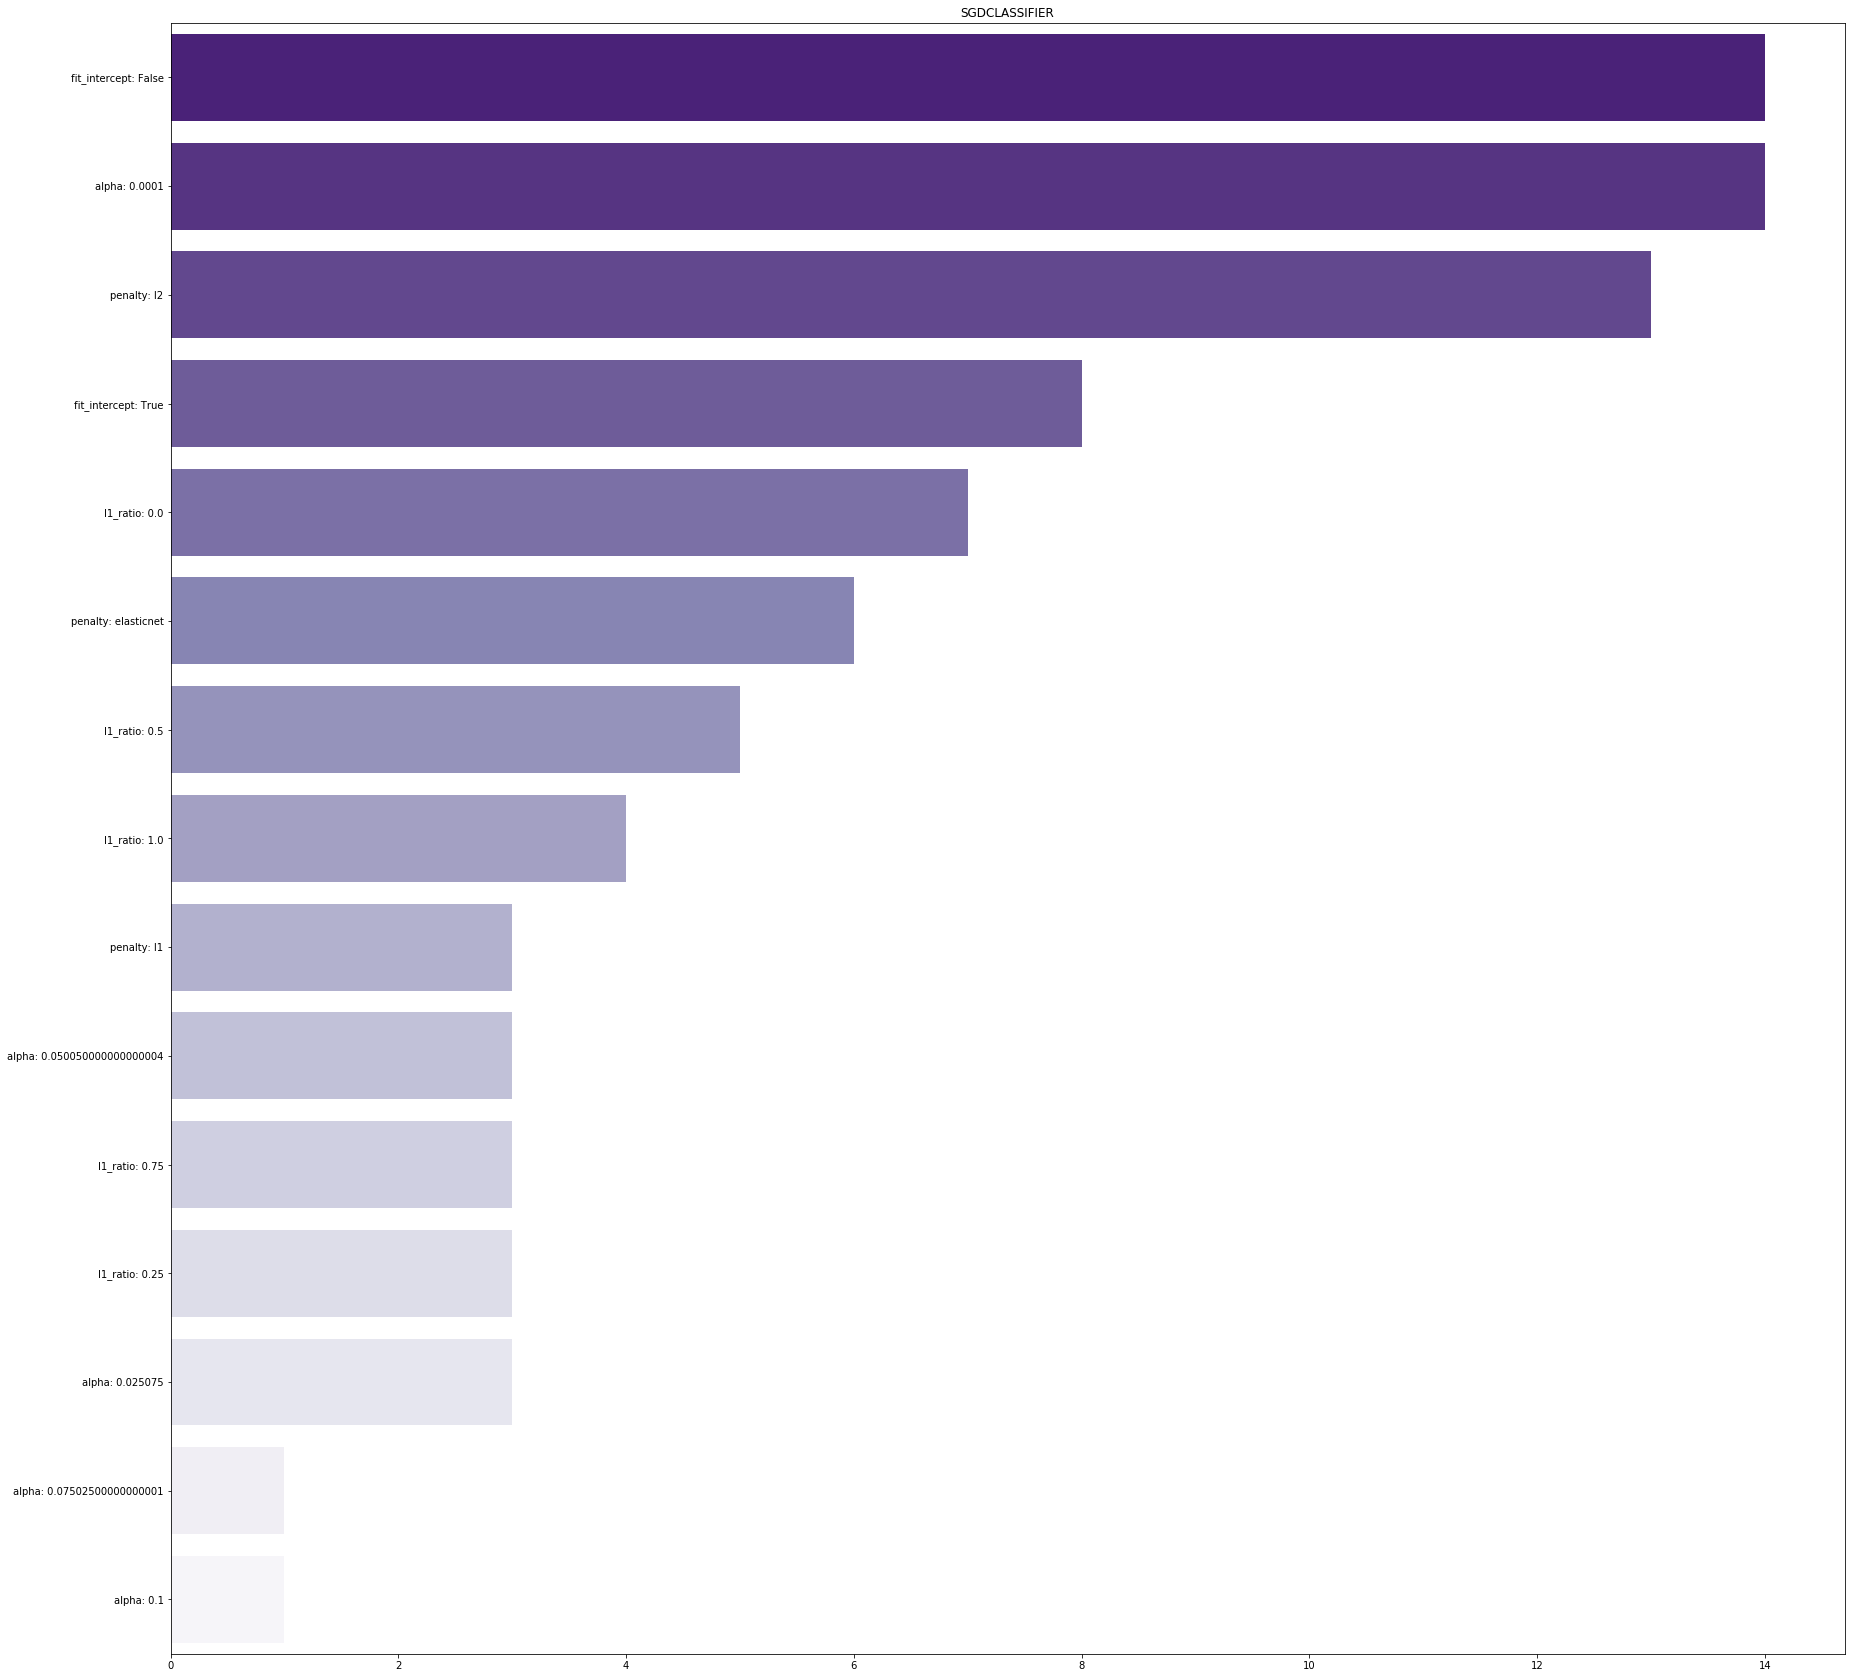

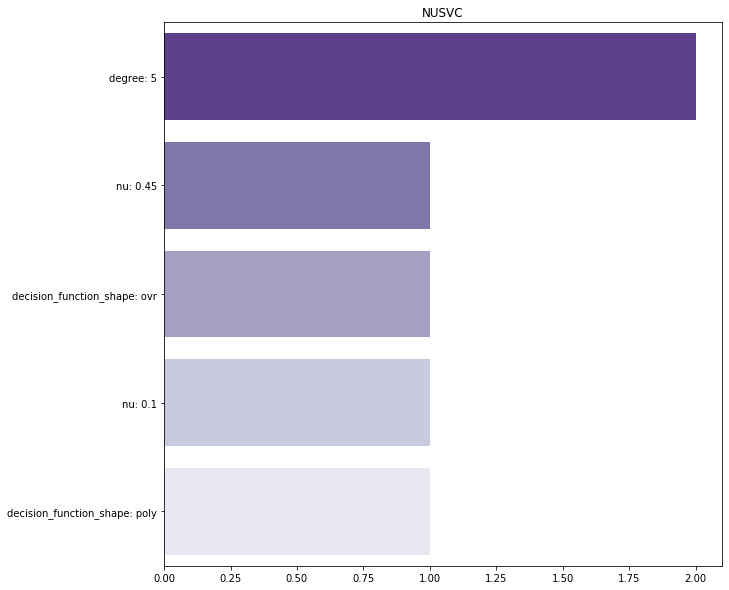

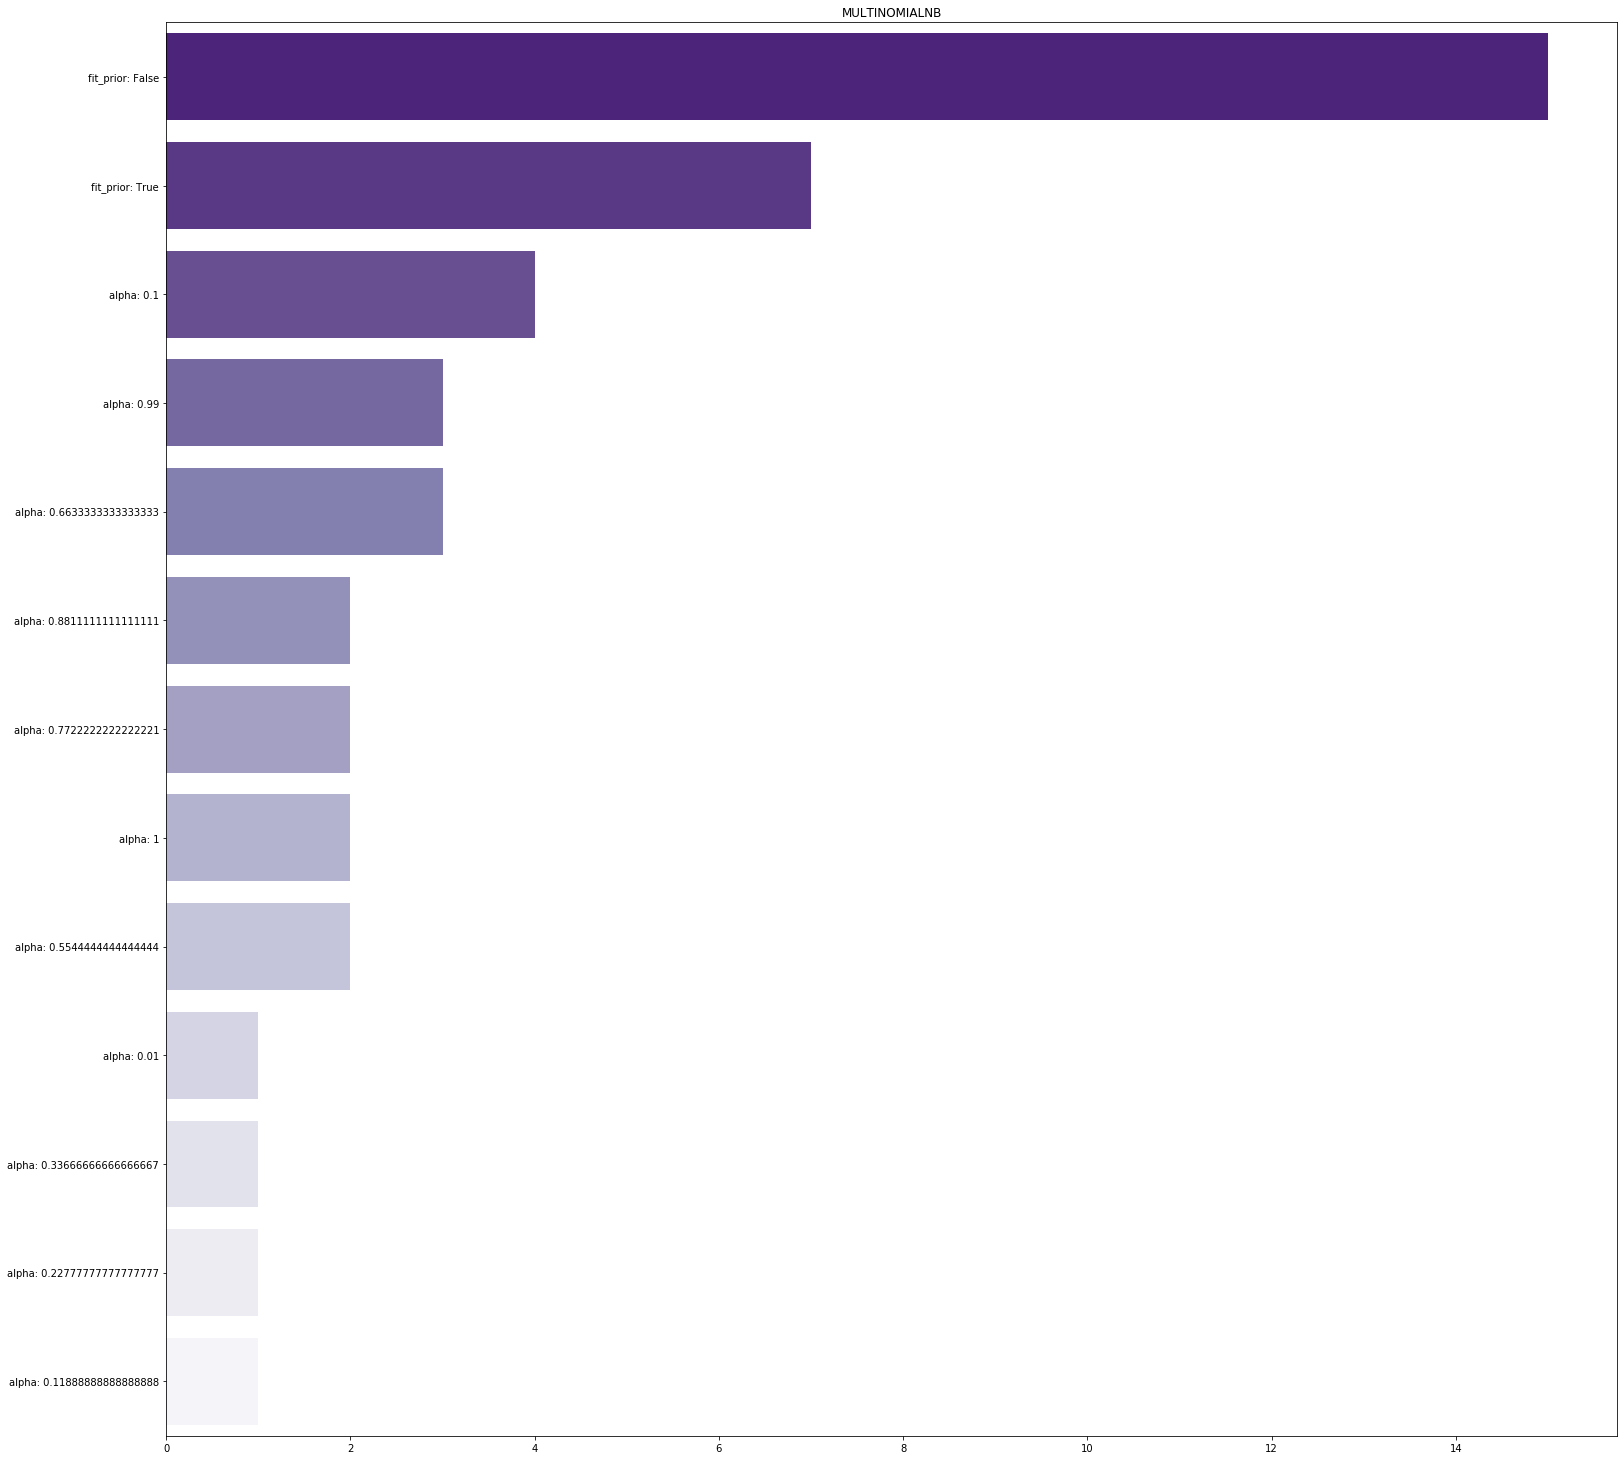

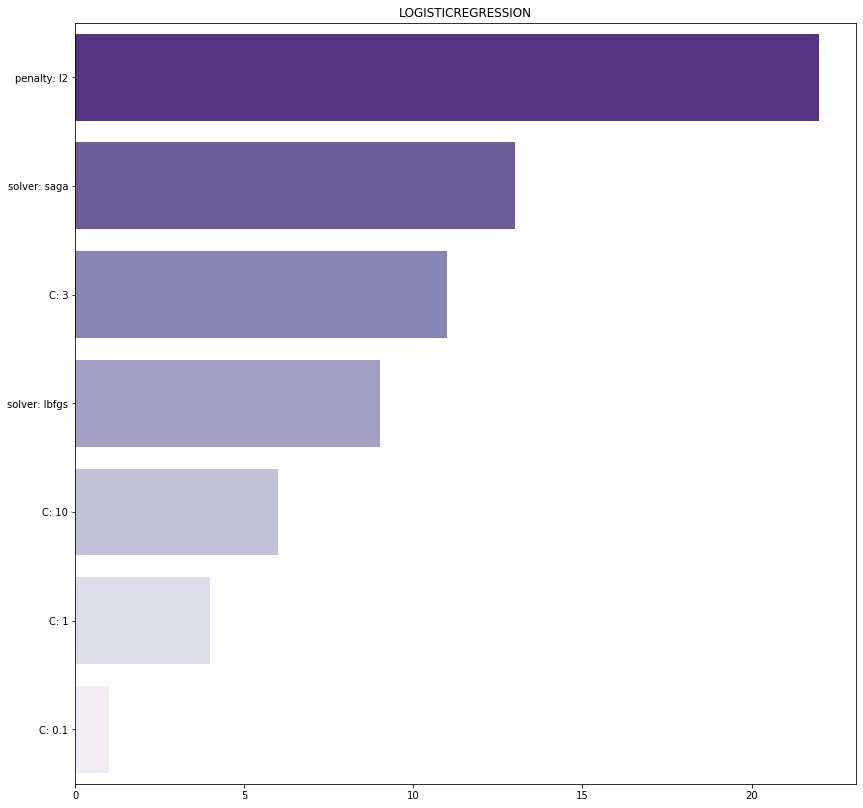

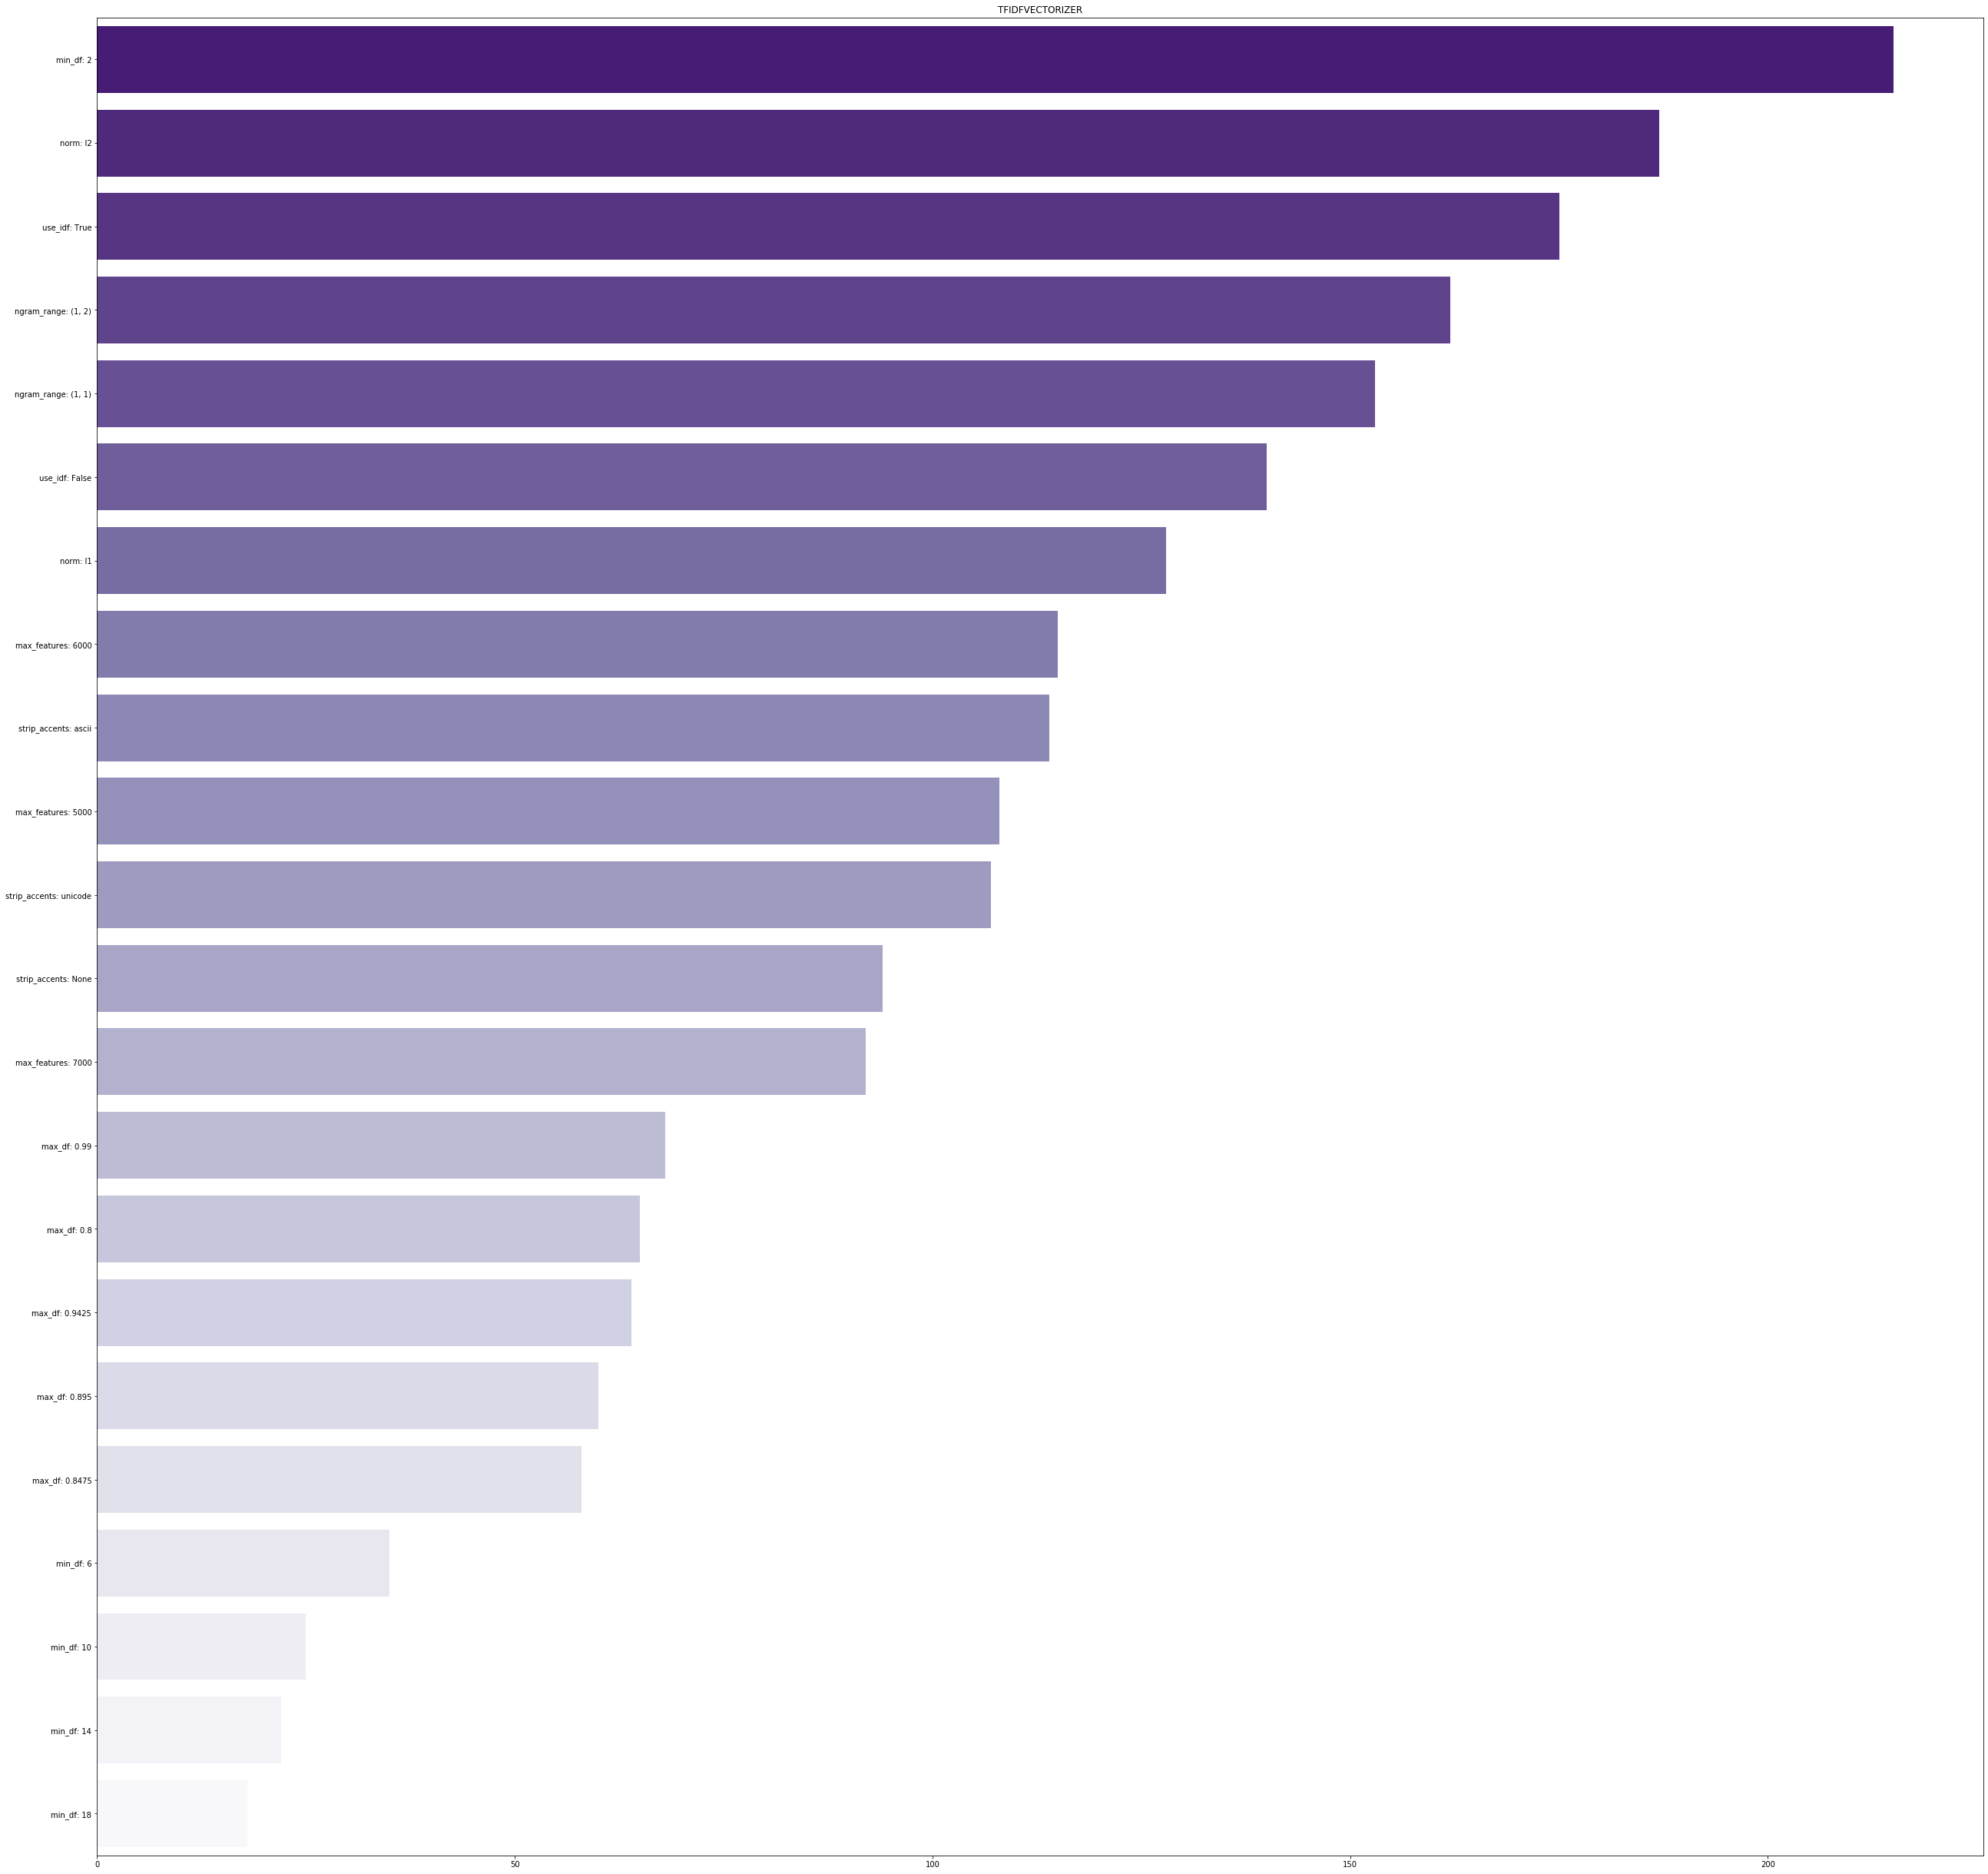

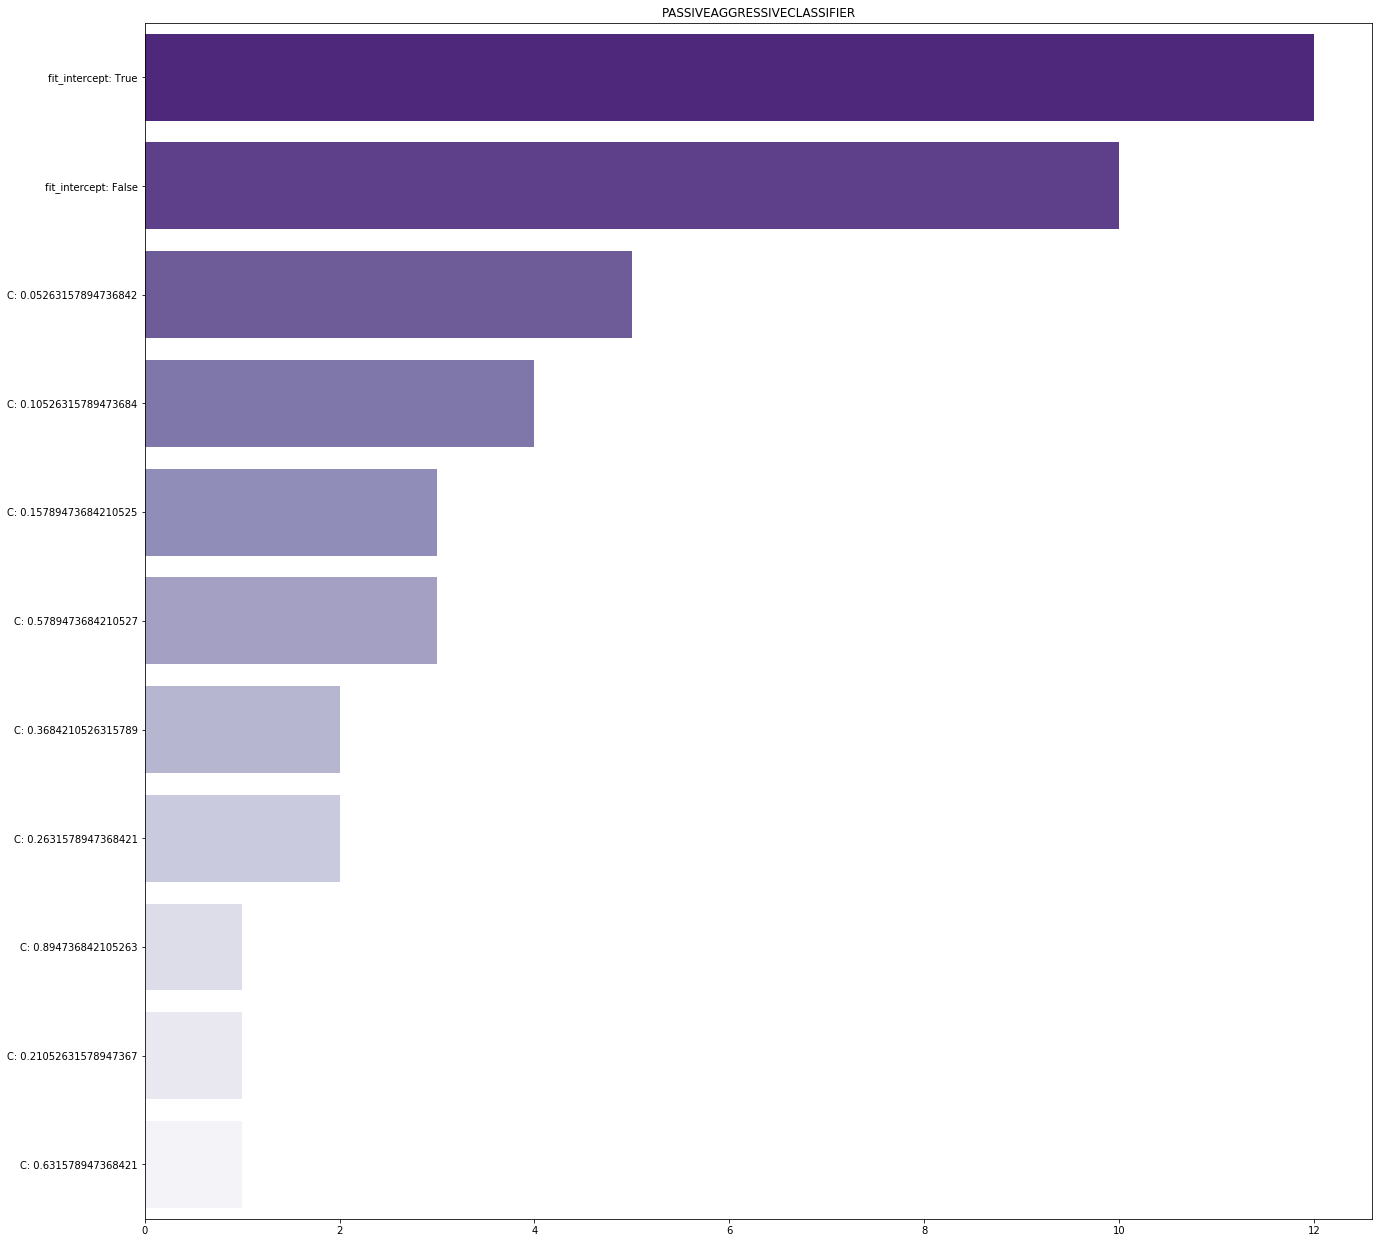

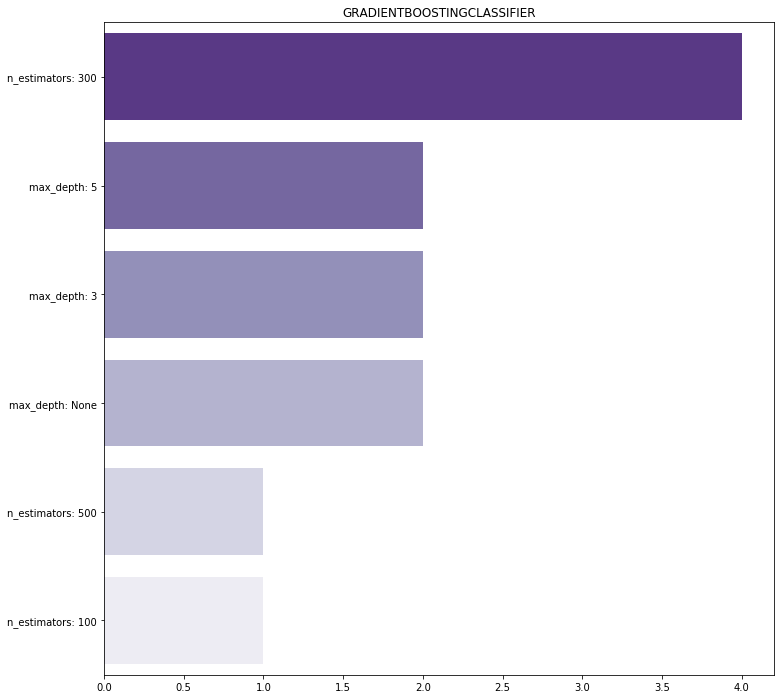

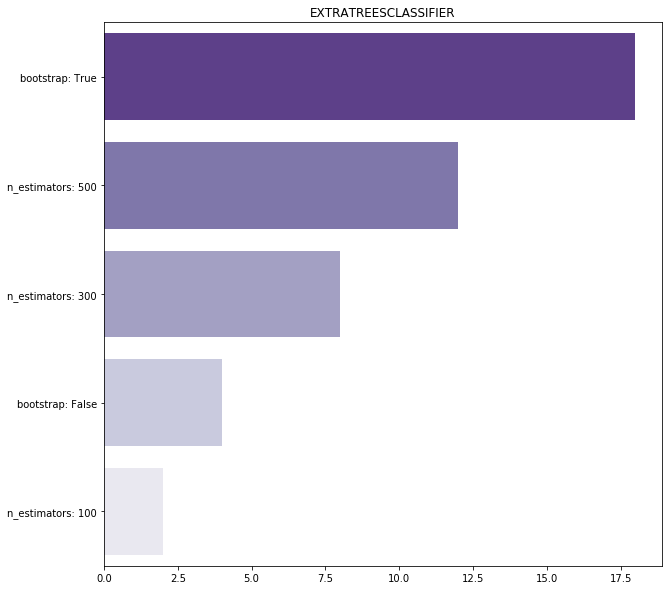

In [96]:
estimators = set(estimator[0] for estimator in counted.keys())
for estimator in estimators:
    plot_best_params(estimator, cmap='Purples_r')